## Importing required libraries and load the dataset

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Jagan\Downloads\spam.csv",encoding = 'latin1',engine = "python",usecols = ['v1','v2'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [128]:
df.shape

(5572, 2)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [132]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


##  Data preprocessing

In [134]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [136]:
#import library
import re
import string
#function to process the text
def cleaner(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub(r'https?://\S+\www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub(r'\w*\d\w*','',text)
    return text    

In [138]:
df['v2'] = df['v2'].apply(cleaner)

In [140]:
df.head()

,v1,v2
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...


### Feature Engineering

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

## Dividing the data into X-variable and y-variable

In [144]:
x = vectorizer.fit_transform(df['v2']).toarray()
y = df['v1']

##   splitting the data  

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [148]:
class_frequencies = df['v1'].value_counts()
print(class_frequencies)

v1
ham     4825
spam     747
Name: count, dtype: int64


In [150]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled,y_resampled = smote.fit_resample(x,y)

In [151]:
print(pd.Series(y_resampled).value_counts())

v1
ham     4825
spam    4825
Name: count, dtype: int64


## Train Model

#### Logistic Regression

In [182]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2',C = 0.01)

In [184]:
lr.fit(x_train,y_train)

LogisticRegression(C=0.01)

In [186]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [188]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,zero_division = 0))

Training Accuracy: 0.87
Testing Accuracy: 0.87

Classification Report (Test Set):
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



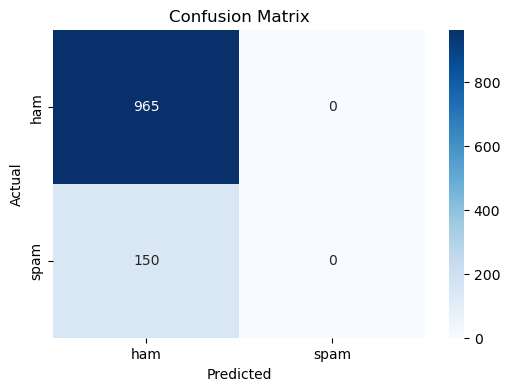

In [190]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Support Vector Machine

In [194]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')

In [196]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [198]:
y_train_pred = svm.predict(x_train)
y_test_pred  = svm.predict(x_test)

In [200]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,zero_division = 0))

Training Accuracy: 1.00
Testing Accuracy: 0.98

Classification Report (Test Set):
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



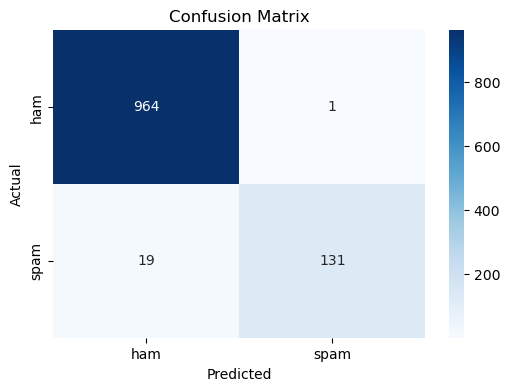

In [202]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Naive Bayes

In [204]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [206]:
nb.fit(x_train,y_train)

GaussianNB()

In [208]:
y_train_pred = nb.predict(x_train)
y_test_pred  = nb.predict(x_test) 

In [210]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,zero_division = 0))

Training Accuracy: 0.93
Testing Accuracy: 0.89

Classification Report (Test Set):
              precision    recall  f1-score   support

         ham       0.98      0.89      0.93       965
        spam       0.56      0.88      0.69       150

    accuracy                           0.89      1115
   macro avg       0.77      0.89      0.81      1115
weighted avg       0.92      0.89      0.90      1115



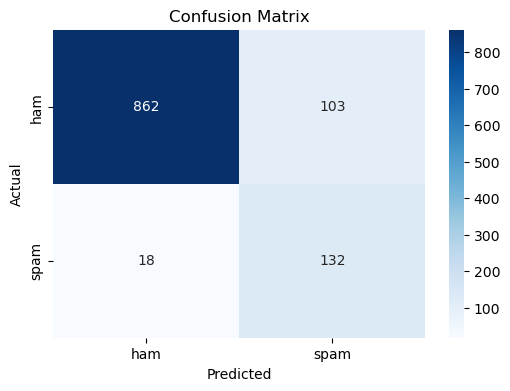

In [212]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()